# Basic classification: Classify images of clothing

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

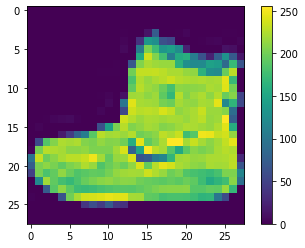

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

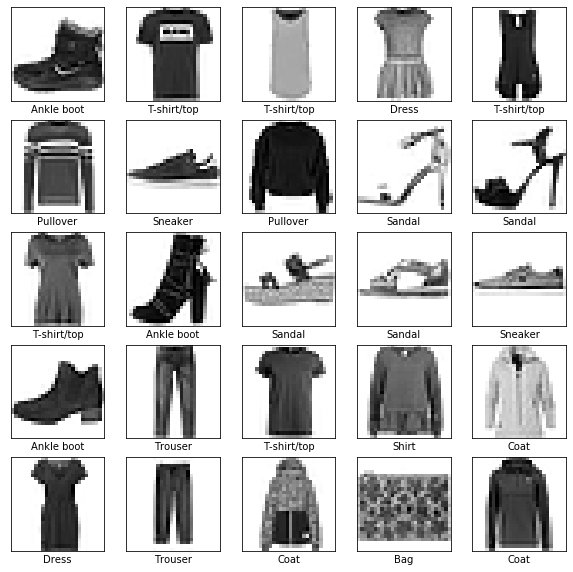

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [10]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3504 - accuracy: 0.8718
Epoch 2/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.3278 - accuracy: 0.8803
Epoch 3/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.3093 - accuracy: 0.8852
Epoch 4/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2911 - accuracy: 0.8921
Epoch 5/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2773 - accuracy: 0.8971
Epoch 6/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2622 - accuracy: 0.9031
Epoch 7/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2548 - accuracy: 0.9059
Epoch 8/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2442 - accuracy: 0.9078
Epoch 9/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2360 - accuracy: 0.9

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2409 - accuracy: 0.8804

Test accuracy: 0.8804


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

## Make predictions

With the model trained, you can use it to make predictions about some images.

In [12]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [13]:
predictions[0]

array([1.1080719e-07, 1.3582636e-09, 1.0233232e-09, 6.0461551e-09,
       7.4562863e-09, 1.3671957e-03, 1.1294435e-08, 9.2700915e-03,
       7.5733295e-09, 9.8936266e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [43]:
np.array(list(map(np.argmax, predictions)))

array([9, 2, 1, ..., 8, 1, 5])

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [15]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
    color = 'blue'
    else:
    color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

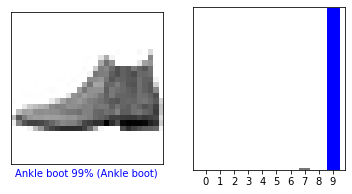

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

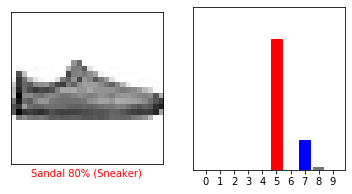

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

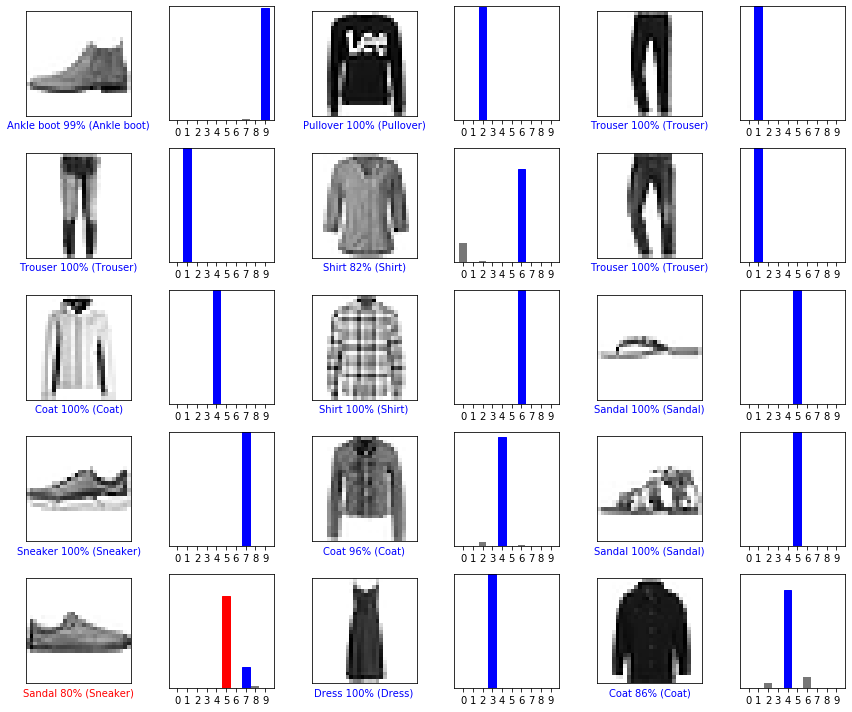

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [36]:
type(test_images[0])

numpy.ndarray

Finally, use the trained model to make a prediction about a single image.

In [23]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [25]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.7098194e-05 3.5425516e-15 9.9904710e-01 1.2624852e-15 8.9147658e-04
  1.6100279e-12 2.4338224e-05 6.2852525e-18 3.4029131e-09 1.0012189e-13]]


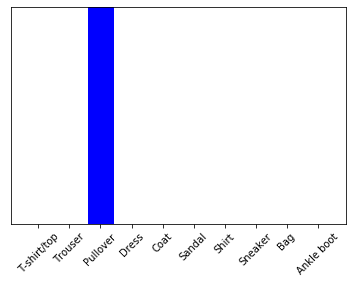

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [27]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

# Define BentoService for model serving

In [151]:
%%writefile tensorflow_fashion_mnist.py

import bentoml
import numpy as np
from PIL import Image

from bentoml.artifact import TensorflowSavedModelArtifact
from bentoml.handlers import ImageHandler


FASHION_MNIST_CLASSES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


@bentoml.env(pip_dependencies=['tensorflow', 'numpy', 'torchvision', 'scikit-learn'])
@bentoml.artifacts([TensorflowSavedModelArtifact('model')])
class FashionMNISTServicer(bentoml.BentoService):

    @bentoml.api(ImageHandler, pilmode='L')
    def predict(self, image):
        img = Image.fromarray(image).resize((28, 28))
        array = 1 - np.asarray(img, dtype=int)[...,0] / 255
        
        outputs = self.artifacts.model.add(np.expand_dims(array, axis=0))        
        _, output_classes = outputs.argmax(axis=1)
        
        return FASHION_MNIST_CLASSES[output_classes[0]]

Overwriting tensorflow_fashion_mnist.py


In [153]:
from tensorflow_fashion_mnist import FashionMNISTServicer

class Predict(tf.Module):
    @tf.function(input_signature=[tf.TensorSpec(shape=(1, 28, 28), dtype=tf.float32)])
    def add(self, x):
        return model.predict(x, steps=1)
    
to_export = Predict()


# 2) `pack` it with required artifacts
bento_svc = FashionMNISTServicer()
bento_svc.pack("model", to_export)


# 3) save your BentoSerivce
saved_path = bento_svc.save()

ValueError: in converted code:

    <ipython-input-152-e0ec034e2ca8>:6 add  *
        return model.predict(x, steps=1)
    /Users/albert/Usr/anaconda3/envs/bentoml/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py:909 predict
        use_multiprocessing=use_multiprocessing)
    /Users/albert/Usr/anaconda3/envs/bentoml/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_arrays.py:722 predict
        callbacks=callbacks)
    /Users/albert/Usr/anaconda3/envs/bentoml/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_arrays.py:189 model_iteration
        f = _make_execution_function(model, mode)
    /Users/albert/Usr/anaconda3/envs/bentoml/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_arrays.py:565 _make_execution_function
        return model._make_execution_function(mode)
    /Users/albert/Usr/anaconda3/envs/bentoml/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py:2190 _make_execution_function
        self._make_predict_function()
    /Users/albert/Usr/anaconda3/envs/bentoml/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py:2180 _make_predict_function
        **kwargs)
    /Users/albert/Usr/anaconda3/envs/bentoml/lib/python3.7/site-packages/tensorflow_core/python/keras/backend.py:3773 function
        return EagerExecutionFunction(inputs, outputs, updates=updates, name=name)
    /Users/albert/Usr/anaconda3/envs/bentoml/lib/python3.7/site-packages/tensorflow_core/python/keras/backend.py:3657 __init__
        raise ValueError('Unknown graph. Aborting.')

    ValueError: Unknown graph. Aborting.


In [154]:
!bentoml serve {saved_path}

[2019-11-26 11:31:27,604] WARNING - BentoML local changes detected - Local BentoML repository including all code changes will be bundled together with the BentoService bundle. When used with docker, the base docker image will be default to same version as last PyPI release at version: 0.5.0. You can also force bentoml to use a specific version for deploying your BentoService bundle, by setting the config 'core/bentoml_deploy_version' to a pinned version or your custom BentoML on github, e.g.:'bentoml_deploy_version = git+https://github.com/{username}/bentoml.git@{branch}'
[2019-11-26 11:31:27,621] WARNING - Saved BentoService bundle version mismatch: loading BentoServie bundle create with BentoML version 0.5.0,  but loading from BentoML version 0.5.0+0.g791312c.dirty
[2019-11-26 11:31:28,444] WARNING - BentoML local changes detected - Local BentoML repository including all code changes will be bundled together with the BentoService bundle. When used with docker, the base docker image w